In [2]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#To read csv file
data = pd.read_csv("LoanApprovalPrediction.csv")

In [4]:
#to view first few columns of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Dropping loan_id column
data.drop(['Loan_ID'],inplace=True,axis=1)

In [6]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


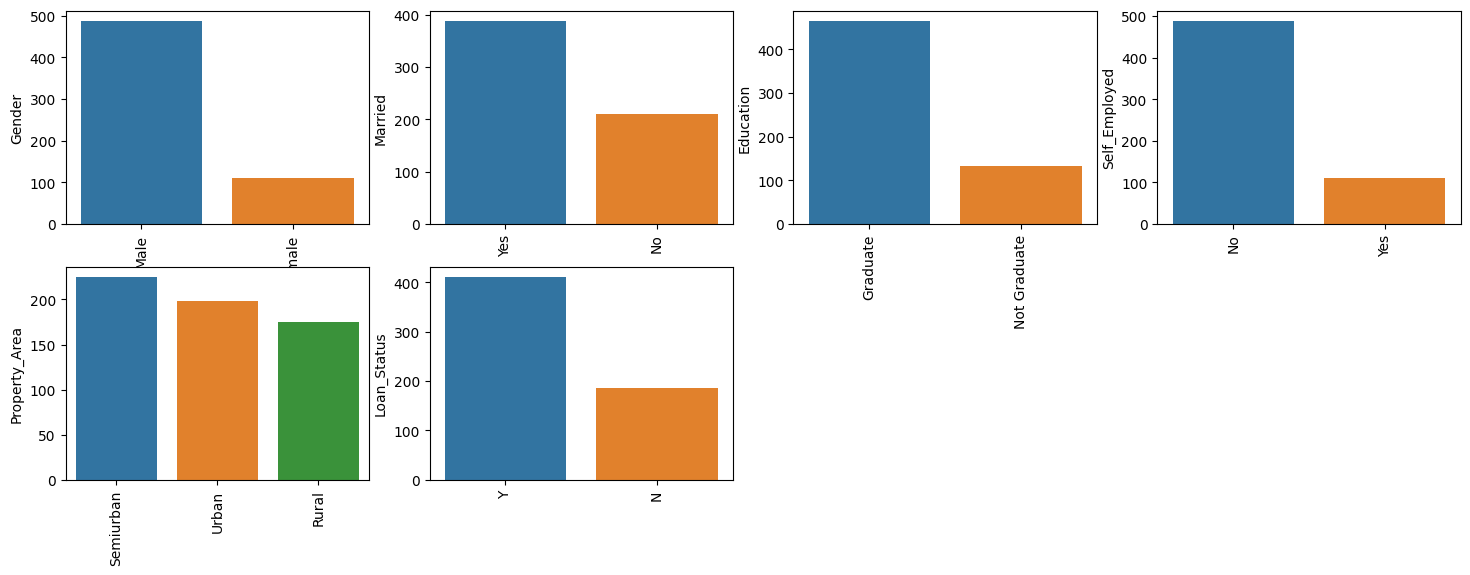

In [7]:
#To Visualize all the unique values in columns using barplot, this will simply show which value is dominating as per our dataset.
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [10]:
#As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = le.fit_transform(data[col])

<Axes: >

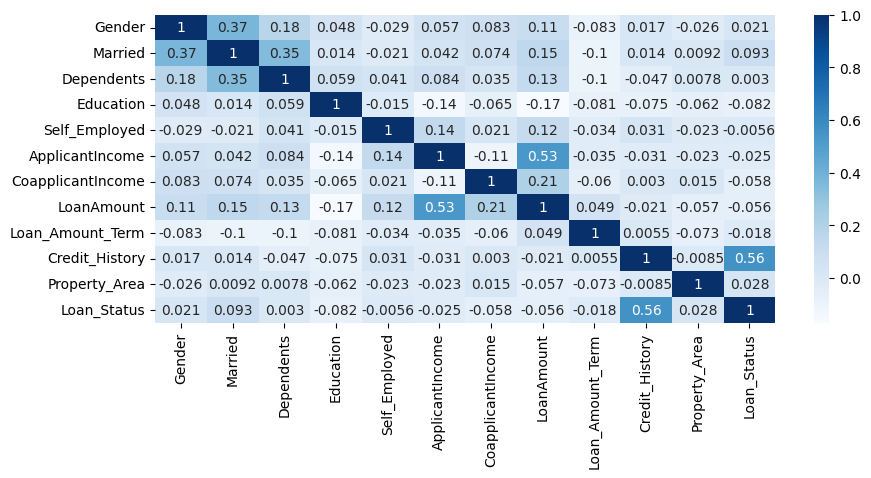

In [11]:
#Let's plot heatmap
plt.figure(figsize=(10,4))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)

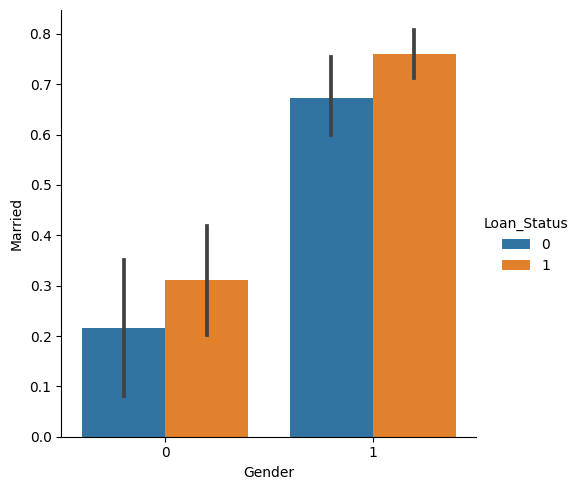

In [19]:
#The above heatmap is showing the correlation between Loan Amount and ApplicantIncome & also  Credit_History has a high impact on Loan_Status.
#Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

sns.catplot(x='Gender', y='Married', hue='Loan_Status', kind='bar', data=data)

In [13]:
#now, will find if their are any missing values & if yes will fill it with mean
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
#Let's define our X & y Variables and split the dataset into train & test
X=data.values[:,:-1]
y=data.values[:,-1]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train.shape, X_test.shape

((478, 11), (120, 11))

In [35]:
y_train.shape, y_test.shape

((478,), (120,))

In [36]:
#Now, Model training & Evaluation step
#As this is a classification problem so we will be using these models :
#KNeighborsClassifiers
#RandomForestClassifiers
#Support Vector Classifiers (SVC)
#Logistics Regression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# first, initialize the classificators
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
rfc = RandomForestClassifier(n_estimators=100,random_state=10,bootstrap=True)
svm =SVC(kernel = "rbf", gamma=0.1, C=1, random_state=10)
logreg = LogisticRegression(multi_class="multinomial",random_state=10)

#now create a list with the objects
models = [knn,rfc,svm,logreg]

In [37]:
#making predictions on the training set
from sklearn.metrics import accuracy_score
for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_train) # then predict on the test set
    accuracy= accuracy_score(y_train, y_pred)
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("\n")

The accuracy of the  KNeighborsClassifier  model is  70.7112970711297


The accuracy of the  RandomForestClassifier  model is  100.0


The accuracy of the  SVC  model is  100.0


The accuracy of the  LogisticRegression  model is  80.5439330543933




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
#making predictions on the testing set
from sklearn.metrics import accuracy_score
for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred)
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("\n")

The accuracy of the  KNeighborsClassifier  model is  70.83333333333334


The accuracy of the  RandomForestClassifier  model is  79.16666666666666


The accuracy of the  SVC  model is  70.83333333333334


The accuracy of the  LogisticRegression  model is  82.5




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**LogisticRegression is giving the best accuracy with an accuracy score of 82.5% for the testing dataset.**
